# Monte Carlo sampling

Author: Dimitris G. Giovanis,  
Date: June 20, 2018  
Last Modified: Michael D. Shields  
Date: December 4, 2018  
UQpy Version 2.0

In this example, a Monte Carlo sampling is employed to generate samples utilizing the UQpy MCS class. 

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the MCS class from UQpy.

In [1]:
from UQpy.SampleMethods import MCS
import numpy as np
import matplotlib.pyplot as plt
import time

Run MCS in order to generate 1000 samples in:
- 2 dimensions
- from the Normal pdf with unit variance.

In [2]:
x = MCS(dist_name=['Normal', 'Normal'], dist_params=[[0, 1], [0, 1]], nsamples=1000, verbose=True)

UQpy: Running Monte Carlo Sampling...
UQpy: Monte Carlo Sampling Complete.


Plot the samples

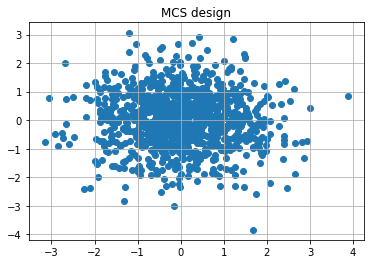

In [3]:
fig, ax = plt.subplots()
plt.title('MCS design')
plt.scatter(x.samples[:, 0], x.samples[:, 1])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

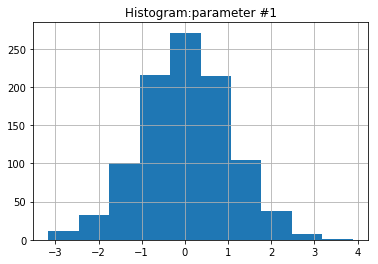

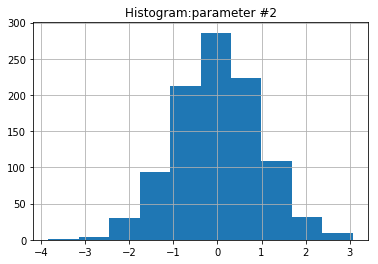

In [4]:
fig, ax = plt.subplots()
plt.title('Histogram:parameter #1')
plt.hist(x.samples[:, 0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig, ax = plt.subplots()
plt.title('Histogram:parameter #2')
plt.hist(x.samples[:, 1])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()